In [1]:
!pip3 install math
!pip3 install lmfit
!pip3 install scipy

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [9]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.optimize import curve_fit
from scipy.signal import medfilt
from astropy.io import fits

In [10]:
def sa(t, c,a1,a2,a3,a4,P,t1,t2,t3,t4):
    return c+a1*np.sin(2*math.pi*(t-t1)/P)+a2*np.sin(2*math.pi*(t-t2)/(P/2))+a3*np.sin(2*math.pi*(t-t3)/(P/3))+a4*np.sin(2*math.pi*(t-t4)/(P/4))

In [11]:

lc=np.loadtxt("/Users/plavchan/Desktop/tofile/AUMic/ForCurveFitting.txt")
print(lc.shape)
print(lc[:,0])

FileNotFoundError: /Users/plavchan/Desktop/tofile/AUMic/ForCurveFitting.txt not found.

In [12]:
init_vals = [1.00675686,0.0181566137,0.0115096449,0.0229175483,0.242512102,4.86157236,1337.56897,1338.068734,1769.48725,1606.60839]
best_vals, covar = curve_fit(sa, lc[:,0], lc[:,1], p0=init_vals)
print(best_vals)

NameError: name 'lc' is not defined

In [13]:
gmodel = Model(sa)
result = gmodel.fit(lc[:,1], t=lc[:,0], c=1.00675686e+00,a1=1.81566125e-02,a2=1.15096449e-02,a3=-3.90924741e-01,a4=-3.89635008e-01,P=4.86157211e+00,t1=1.33756897e+03,t2=1.33806734e+03,t3=1.76948608e+03,t4=1.60662441e+03)
resid=lc.copy()
resid[:,1]=lc[:,1]-result.best_fit
plt.plot(lc[:,0], resid[:,1], 'bo')
#plt.plot(lc[:,0], result.best_fit, 'r-')
plt.show()
np.savetxt('4Presiduals.txt',resid)



NameError: name 'lc' is not defined

In [7]:
plt.plot(lc[:,0], lc[:,1], '.k')
plt.plot(lc[:,0], result.best_fit, 'r-')
plt.show()


NameError: name 'lc' is not defined

In [8]:
resid2=resid.copy()
resid2[:,1]=resid2[:,1]-medfilt(resid[:,1],201)
plt.plot(lc[:,0],resid2[:,1], 'bo')
plt.ylim(-0.005,0.005)
#plt.plot(lc[:,0], result.best_fit, 'r-')
plt.show()
np.savetxt('4P_med201_residuals.txt',resid2)

NameError: name 'resid' is not defined

In [17]:
# testing detrending
from scipy.interpolate import BSpline, splrep, splev
from scipy.optimize import curve_fit

In [47]:
fits_file = "tess2018206045859-s0001-0000000441420236-0120-s_lc.fits"

with fits.open(fits_file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    quality=hdulist[1].data['QUALITY']

mask = ~np.isnan(pdcsap_fluxes)
time, flux = tess_bjds[mask], pdcsap_fluxes[mask]

In [98]:

tck = splrep(time, flux, s=10, k = 3)  # Fit spline to ALL original points
spline = BSpline(*tck)

time_fine = np.linspace(time.min(), time.max(), int(len(time)/100))  # Fewer points
flux_fine = spline(time_fine)  # Spline evaluated at reduced resolution

# To get spline values at original time points (for division/normalization):
flux_spline = spline(time)  # Evaluated at every original time point
flux_normalized = flux / flux_spline  # Divide original flux by spline

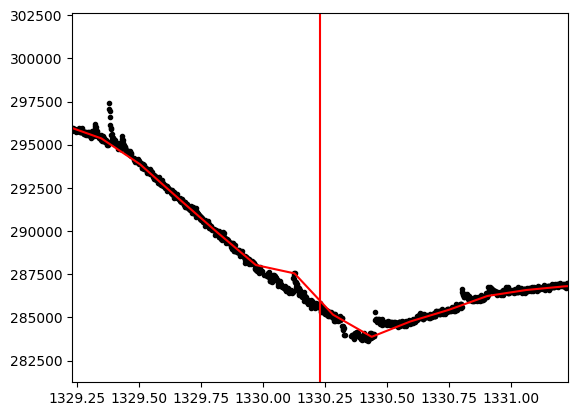

In [99]:
plt.figure()
plt.plot(time, flux, '.k')
plt.plot(time_fine, flux_fine, '-r')

t0 = 1330.2317532791437

plt.xlim(t0 - 1, t0 + 1)
plt.axvline(x=t0, color="red")

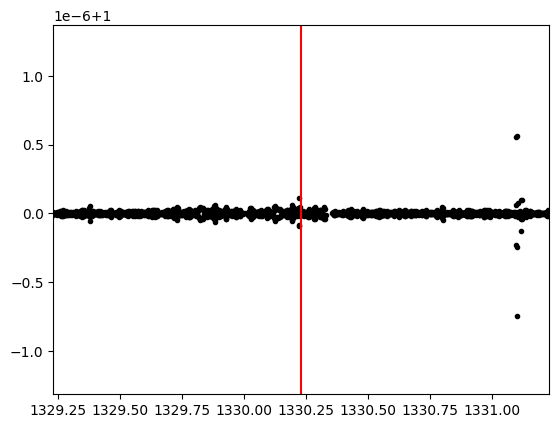

In [95]:
plt.figure()
plt.plot(time, flux_normalized, '.k')

t0 = 1330.2317532791437

plt.xlim(t0 - 1, t0 + 1)
plt.axvline(x=t0, color="red")